# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and Explore the Data

In [4]:
# Load the data
data = pd.read_csv("BI - Dataset.csv")

data.head(5)


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [5]:
# Check for missing values
data.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [6]:
# Drop missing values
data = data.dropna()

In [7]:
# Confirm missing values
data.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

# Data Pre-processing

In [8]:
# Convert date columns to datetime format
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

In [9]:
# Calculate delivery time (time taken for delivery)
data['delivery_time'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 3600

In [10]:
# Select relevant features and target variable
features = ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 
            'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners',
            'total_busy_partners', 'total_outstanding_orders']

target = 'delivery_time'

In [11]:
# Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Data Analysis and Model Development

In [12]:
# Convert categorical features to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['market_id', 'store_primary_category', 'order_protocol'])

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [14]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict delivery time on test set
y_pred = model.predict(X_test)

In [16]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.20075038068818463
Root Mean Squared Error: 0.2910836271295794


# Insights 

In [17]:
# Interpret coefficients to understand feature impact
coefficients = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

                                Feature  Coefficient
92                   order_protocol_6.0     0.215278
36  store_primary_category_comfort-food     0.181938
22       store_primary_category_belgian     0.127001
77      store_primary_category_southern     0.124252
23     store_primary_category_brazilian     0.100110
..                                  ...          ...
45     store_primary_category_gastropub    -0.089641
42          store_primary_category_fast    -0.091618
33        store_primary_category_cheese    -0.101034
74   store_primary_category_singaporean    -0.132988
93                   order_protocol_7.0    -0.136248

[94 rows x 2 columns]


# Visualizations

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Set style for Seaborn plots
sns.set(style="whitegrid")

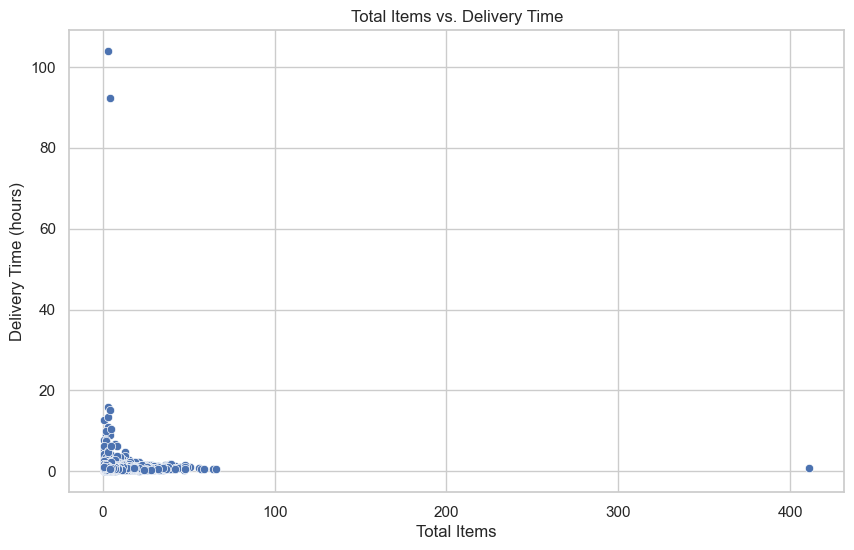

In [20]:
# Scatter Plot: Total Items vs. Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_items', y='delivery_time', data=data)
plt.title('Total Items vs. Delivery Time')
plt.xlabel('Total Items')
plt.ylabel('Delivery Time (hours)')
plt.show()

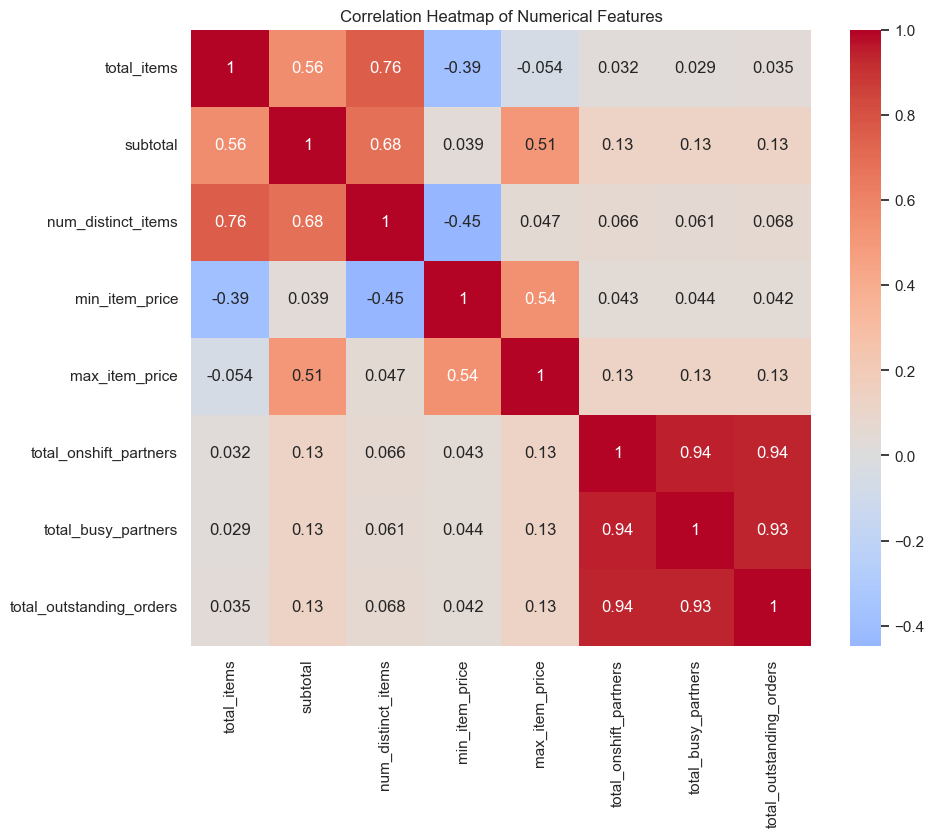

In [21]:
correlation_matrix = data[['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
                          'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

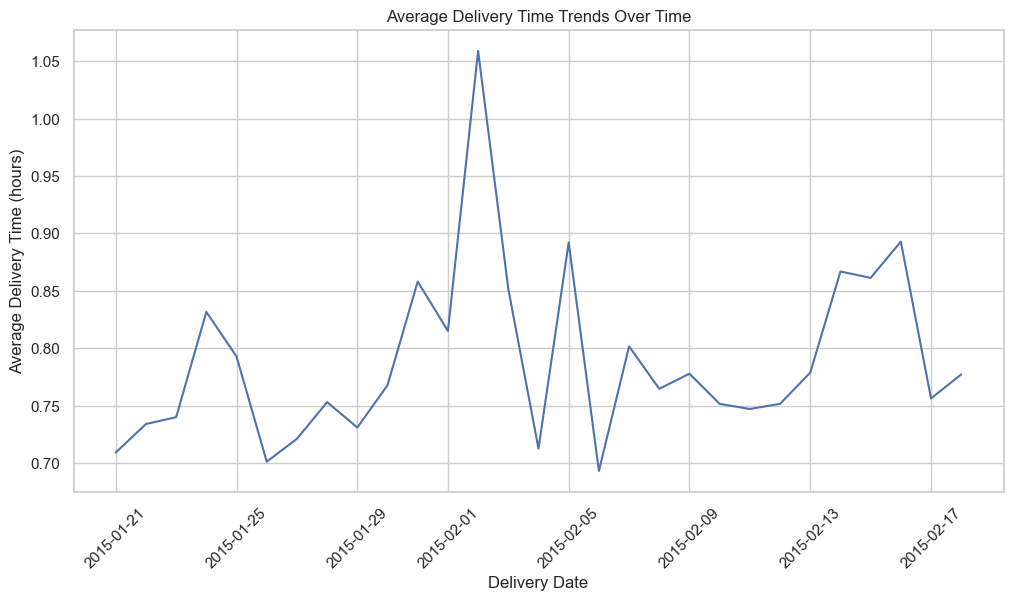

In [22]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])
data['delivery_date'] = data['created_at'].dt.date
delivery_time_by_date = data.groupby('delivery_date')['delivery_time'].mean()

plt.figure(figsize=(12, 6))
delivery_time_by_date.plot(kind='line')
plt.title('Average Delivery Time Trends Over Time')
plt.xlabel('Delivery Date')
plt.ylabel('Average Delivery Time (hours)')
plt.xticks(rotation=45)
plt.show()

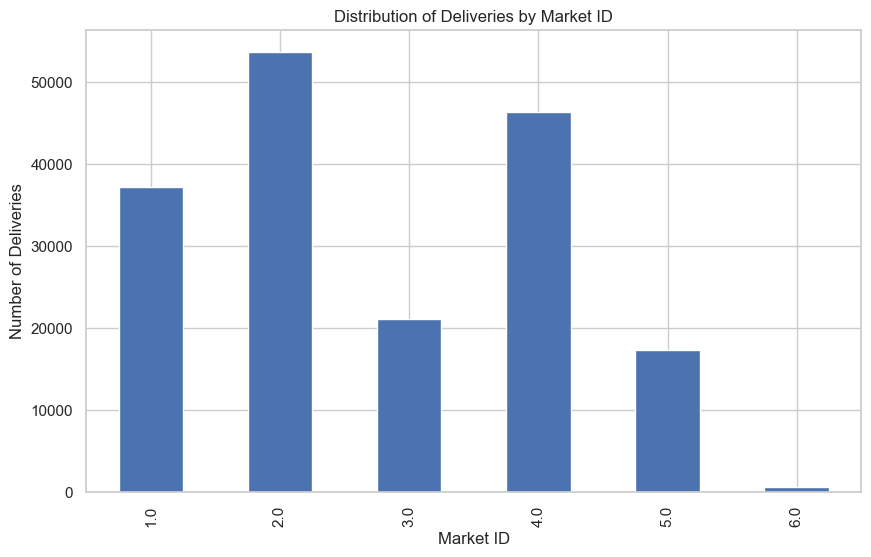

In [23]:
plt.figure(figsize=(10, 6))
market_distribution = data['market_id'].value_counts().sort_index()
market_distribution.plot(kind='bar')
plt.title('Distribution of Deliveries by Market ID')
plt.xlabel('Market ID')
plt.ylabel('Number of Deliveries')
plt.show()

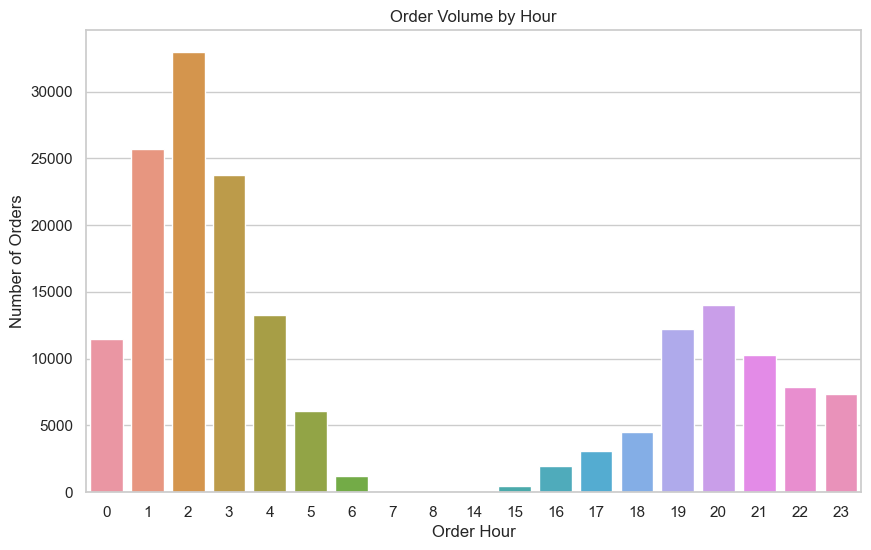

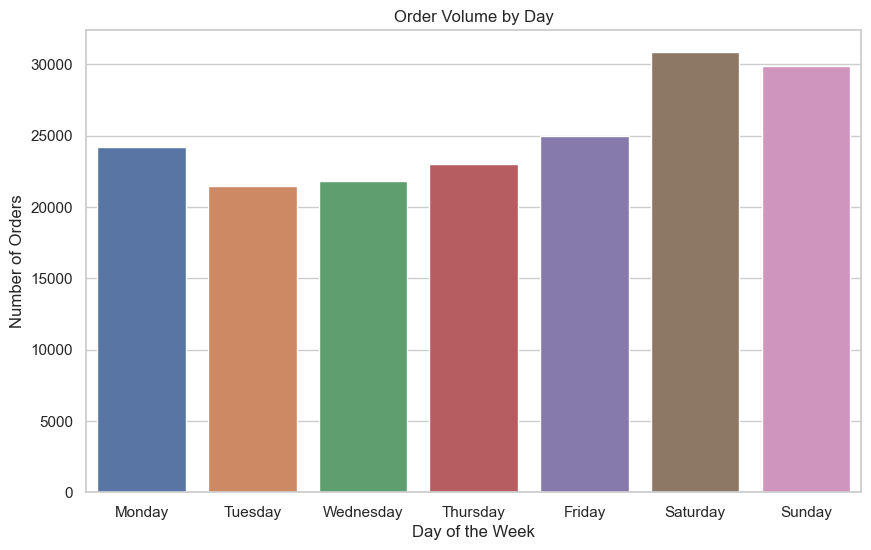

In [34]:
# Extract hour and day from timestamps
data['created_at'] = pd.to_datetime(data['created_at'])
data['order_hour'] = data['created_at'].dt.hour
data['order_day'] = data['created_at'].dt.day_name()

# Bar plot of order volume by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='order_hour', data=data)
plt.title('Order Volume by Hour')
plt.xlabel('Order Hour')
plt.ylabel('Number of Orders')
plt.show()

# Bar plot of order volume by day
plt.figure(figsize=(10, 6))
sns.countplot(x='order_day', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Order Volume by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

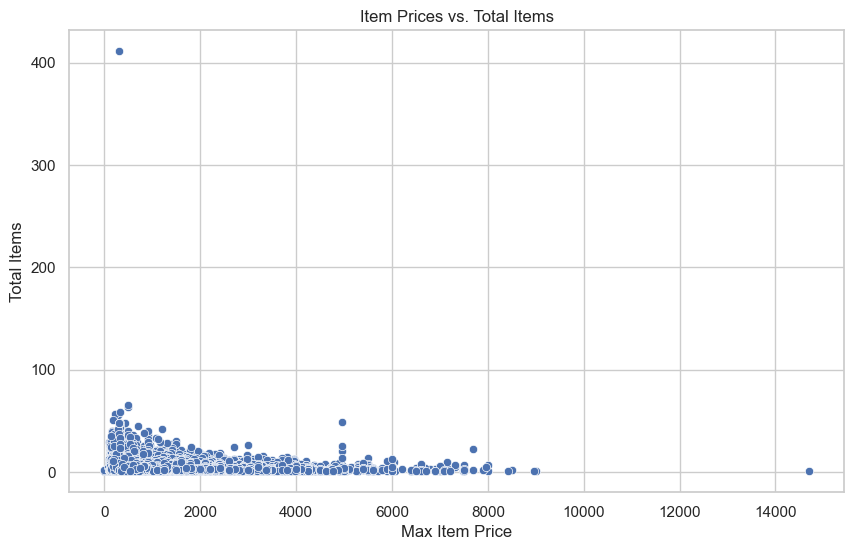

In [35]:
# Scatter plot of item prices vs. total items
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_item_price', y='total_items', data=data)
plt.title('Item Prices vs. Total Items')
plt.xlabel('Max Item Price')
plt.ylabel('Total Items')
plt.show()

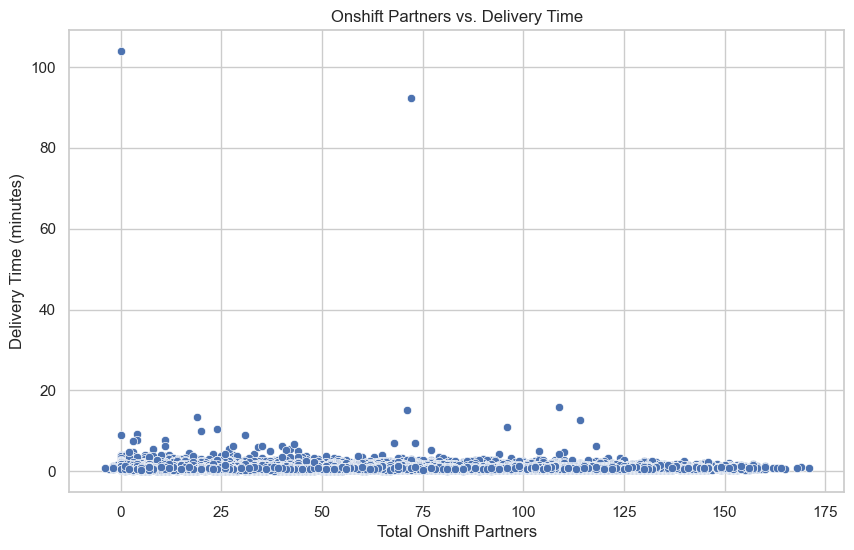

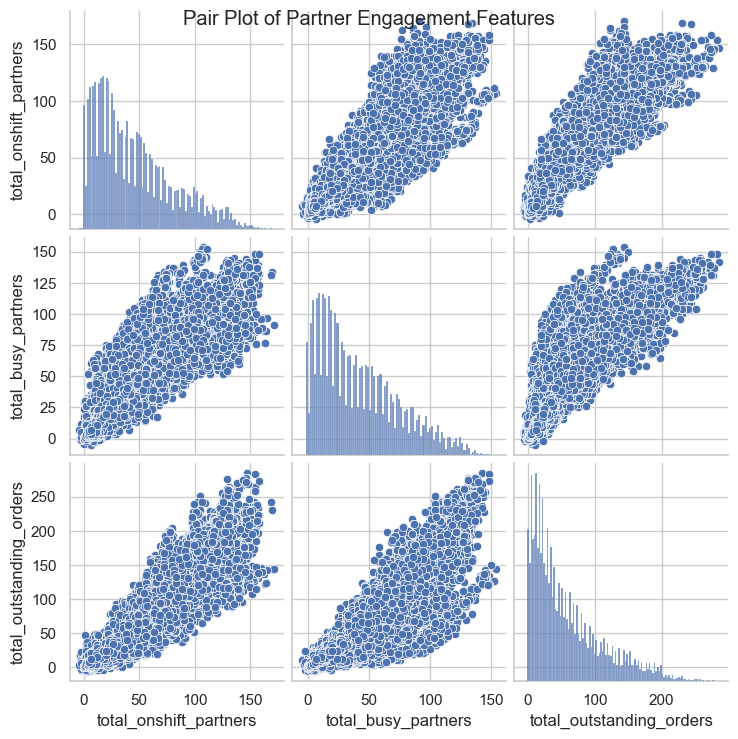

In [36]:
# Scatter plot of total onshift partners vs. delivery time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_onshift_partners', y='delivery_time', data=data)
plt.title('Onshift Partners vs. Delivery Time')
plt.xlabel('Total Onshift Partners')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Pair plot of engagement-related features
sns.pairplot(data, vars=['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders'])
plt.suptitle('Pair Plot of Partner Engagement Features')
plt.show()